<a href="https://colab.research.google.com/github/twyeh/highenergy/blob/main/2_Basic_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flavio[plotting]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.8/594.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.3 MB/s eta 0:00:00
  Created wheel for parton: filename=parton-0.2.2-py3-none-any.whl size=14000 sha256=6b1959ee88dfbc875cd2943458ee3bf62de0d16fc170abadf22bfb8a51aa16b9
  Stored in directory: /root/.cache/pip/wheels/4f/5f/ba/4a4c454a28005125067382ffc0c3e967429b658917d062d75e
  Created wheel for pylha: filename=pylha-0.4-py3-none-any.whl size=58269 sha256=654b4a4773319b3bb41208cdd73d6027678fc2d0125afec99bb23963b44ea087
  Stored in directory: /root/.cache/pip/wheels/e5/fa/51/6cb033ac4cb2857410fa6e15c87a4501df116007d79c91b473
Successfully

In [15]:
import numpy as np

In [16]:
np.set_printoptions(legacy='1.25')

# flavio tutorial

## Part 2: Basic concepts



## Submodules

flavio contains several submodules, most importantly:

- `flavio.physics`: contains theory predictions for observables
- `flavio.statistics`: contains routines to deal with (exp. & th.) uncertainties, construct likelihoods, perform fits
- `flavio.plots`: contains plotting functoins (essentially convenience functions based on `matplotlib`)

## Observables, parameters, predictions

- An *observable* in flavio is defined as a scalar physical quantity that can be *predicted* as a function of *parameters* and *Wilson coefficients* and then compared to experiment

$$P_O: \vec\theta, \vec C \to \mathbb R$$

- Example: observable $O=\text{BR}(B_s\to\mu^+\mu^-)$, parameters $\vec\theta = (G_F, f_{B_s}, \ldots)$, Wilson coefficients $\vec C = (C_{10}, \ldots)$
- New physics only affects Wilson coefficients (more later)


# More on parameters

- Real numbers that can be me measured quantities (masses, lifetimes, ...) or theoretical parameters (form factor parametrization coefficients, ...)
- Identified by string name, e.g. `'m_mu'`, `'tau_Bs'`
- See <https://flav-io.github.io/docs/parameters.html> for full list
- Default values set on import but can be easily modified

> Q: So what's the difference between a parameter and a measurement?  

A: For flavio, a *parameter* is used as an input to a (theory) prediction of an *observable*, while a *measurement* is an experimental determination of this *observable* (more later)

## Computing SM predictions

- Observables are identified by string names as well, e.g. `'BR(Bs->mumu)'`
- See https://flav-io.github.io/docs/observables.html for full list
- Computing SM prediction:

In [17]:
import flavio
flavio.sm_prediction('BR(Bs->mumu)')

3.6289314570849374e-09

## Pretty representation of observables in IPython

Observables correspond to instances of the `flavio.Observable` class that can be accessed via their name

In [18]:
flavio.Observable['BR(Bs->mumu)']

### Observable `BR(Bs->mumu)`

Observable: $\overline{\text{BR}}(B_s\to \mu^+\mu^-)$

Description: Time-integrated branching ratio of $B_s\to \mu^+\mu^-$.

Theory prediction: `<function flavio.physics.bdecays.bll.bqll_obs_function.<locals>.<lambda>(wc_obj, par)>`

## Observables with arguments

- Observables can also have additional arguements
- Example: branching ratios differential in $q^2$
- Numerical value of argument must be provided when computing prediction

In [19]:
flavio.sm_prediction('dBR/dq2(B0->Denu)', q2=3)

0.0032012323874245625

In [20]:
flavio.Observable['dBR/dq2(B0->Denu)']

### Observable `dBR/dq2(B0->Denu)`

Observable: $\frac{d\text{BR}}{dq^2}(B^0\to D^- e^+\nu_e)$

Description: Differential branching ratio of $B^0\to D^- e^+\nu_e$

Arguments: `q2`

Theory prediction: `<function flavio.physics.bdecays.bplnu.dBRdq2_function.<locals>.<lambda>(wc_obj, par, q2)>`

In [21]:
flavio.Observable['dBR/dq2(B0->Denu)'].arguments

['q2']

## Theoretical uncertainties

- theory uncertainty = probability (or credibility) distribution associated with a prediction
- sources: parametric, higher-order, systematic
- In flavio, **all theory uncertainties are parametric**: PDFs associated with parameters

## Probability distributions in flavio

`flavio.statistics.probability` provides a number of one- and multidimensional PDFs:

In [22]:
[c.__name__ for c
 in flavio.statistics.probability.ProbabilityDistribution.get_subclasses()]

['UniformDistribution',
 'DiscreteUniformDistribution',
 'DeltaDistribution',
 'NormalDistribution',
 'LogNormalDistribution',
 'AsymmetricNormalDistribution',
 'GaussianUpperLimit',
 'HalfNormalDistribution',
 'GammaDistribution',
 'GammaUpperLimit',
 'GammaCountingProcess',
 'GammaDistributionPositive',
 'GeneralGammaUpperLimit',
 'GeneralGammaCountingProcess',
 'GeneralGammaDistributionPositive',
 'GaussianKDE',
 'KernelDensityEstimate',
 'NumericalDistribution',
 'MultivariateNormalDistribution',
 'MultivariateNumericalDistribution']

## Defining parameter uncertainties

- The `flavio.classes.ParameterConstraints` class contains the PDFs associated with parameters
- There is a default instance used by convenience functions like `sm_prediction`: `flavio.default_parameters`
- Default parameters are populated from two YAML files:
    - [parameters_uncorrelated.yml](https://github.com/flav-io/flavio/blob/master/flavio/data/parameters_uncorrelated.yml)
    - [parameters_correlated.yml](https://github.com/flav-io/flavio/blob/master/flavio/data/parameters_correlated.yml)

Example: set bottom quark mass & uncertainty to PDG value

In [23]:
par = flavio.default_parameters
from flavio.statistics.probability import NormalDistribution

# verbose version
par.add_constraint(
    parameters=['m_b'],
    constraint=NormalDistribution(central_value=4.18, standard_deviation=0.04)
)

# short version
par.set_constraint('m_b', '4.18 +- 0.04')

par.get_central('m_b')

4.18

... so what `sm_prediction` actually does is to compute the *prediction* for *central values* of all *parameters*

In [24]:
flavio.sm_prediction('BR(Bs->mumu)')

3.6289314570849374e-09

In [25]:
obs = flavio.Observable['BR(Bs->mumu)']
f = obs.prediction.function
f(flavio.WilsonCoefficients(),
  par=flavio.default_parameters.get_central_all())

3.6289314570849374e-09

## Computing theory uncertainties

The default method to compute theory uncertainties is to generate $N$ random values for all *parameters*, compute the prediction for each random set, and take the mean/variance.

NB, the relative precision is $1/\sqrt{2N}$, computing time $\propto N$!

In [26]:
print('central: ',             flavio.sm_prediction('BR(Bs->mumu)'))
print('uncertainty, N=10: ',   flavio.sm_uncertainty('BR(Bs->mumu)', N=10))
print('uncertainty, N=100: ',  flavio.sm_uncertainty('BR(Bs->mumu)', N=100))
print('uncertainty, N=1000: ', flavio.sm_uncertainty('BR(Bs->mumu)', N=1000))

central:  3.6289314570849374e-09
uncertainty, N=10:  1.1728967338045984e-10
uncertainty, N=100:  8.91126952801845e-11
uncertainty, N=1000:  1.0240983711563366e-10


NB, the default value `N=100` is usually a good compromise between speed & accuracy, but for the final numbers in your paper, better crank it up to 500 or so

## Parallel processing for uncertainty calculation

- Uncertainty calculation can be very slow for some observables
- Speed it up by using multiple cores

In [27]:
%%time
flavio.sm_uncertainty('<P5p>(B0->K*mumu)',
                      q2min=1, q2max=6, N=100)

CPU times: user 5.03 s, sys: 77.2 ms, total: 5.11 s
Wall time: 5.06 s


0.07754178831184985

In [28]:
%%time
flavio.sm_uncertainty('<P5p>(B0->K*mumu)',
                      q2min=1, q2max=6, N=100, threads=2)

CPU times: user 409 ms, sys: 50.4 ms, total: 459 ms
Wall time: 6.5 s


0.09171452181296146

### Visualizing error budgets

To understand the dominant sources of theory uncertainties, it can be useful to evaluate the uncertainties for one parameter (or correlated set of parameters) at a time. In flavio, this is done with the function `sm_error_budget`:

In [29]:
err_bsmumu = flavio.sm_error_budget('BR(Bs->mumu)')
err_bsmumu

{'GF': 9.851085736762529e-07,
 'alpha_e': 0.00013200062059633895,
 'm_Bs': 1.8131233085989576e-05,
 'alpha_s': 1.1397027228746402e-16,
 'm_s': 1.1397027228746402e-16,
 'm_t': 0.0109710137318366,
 'tau_Bs': 0.002999359615603838,
 'Vus': 0.00025196865576134706,
 'f_Bs': 0.009644442339023803,
 'Vcb': 0.02277740081522315,
 'gamma': 0.0024479874681790433,
 'm_b': 1.1397027228746402e-16,
 'm_mu': 4.2133772355457177e-08,
 'DeltaGamma/Gamma_Bs': 0.0046619140986741405,
 'Vub': 0.000752011860992811}

This can now be visualized.

Necessary imports:

In [30]:
import flavio.plots as fpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [32]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [73.0 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,140 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,542 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,246 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backpor

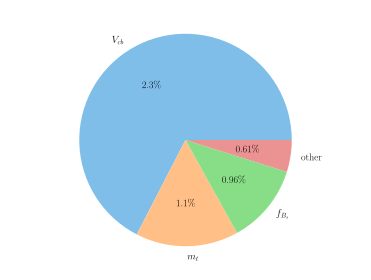

In [33]:
fpl.error_budget_pie(err_bsmumu);

Correlated uncertainties are lumped together:

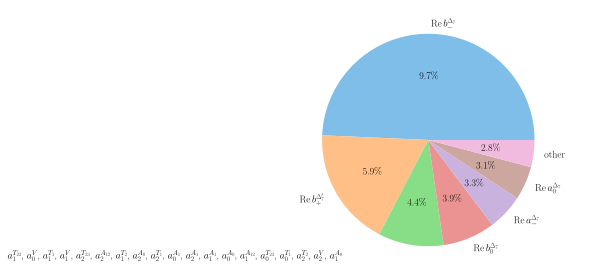

In [34]:
err_p5p = flavio.sm_error_budget('P5p(B0->K*mumu)', q2=4)
fpl.error_budget_pie(err_p5p);

### Error budgets: caveat

The implementations in flavio are a compromise between accuracy and computational speed. For statistical inference, only the total uncertainty is relevant. Thus, subleading contributions that are much smaller than the dominant uncertainty or much smaller than current experimental uncertainties are sometimes omitted.

## Measurements

- A *measurement* is a *probability distribution* associated with one (or more) *observable(s)*
- An *experimentalist* is a person providing this probability distribution 😉

## Predefined measurements

- Contained in [measurements.yaml](https://github.com/flav-io/flavio/blob/master/flavio/data/measurements.yml)
- Simple example:

```yaml
LHCb rad 2012:                       # name
  experiment: 'LHCb'                 # experiment
  inspire: 'Aaij:2012ita'            # tex key
  values:
    BR(Bs->phigamma): 3.5 ± 0.4 e-5  # constraint
```

The constraint associates a normal distribution with the observable

### Things to do with measurements: e.g. plots

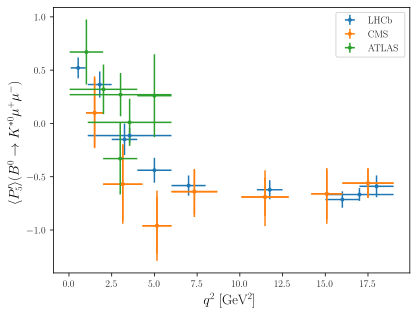

In [44]:
import matplotlib.pyplot as plt
obs = '<P5p>(B0->K*mumu)'
fpl.bin_plot_exp(obs, col_dict={'LHCb': 'C0', 'CMS': 'C1', 'ATLAS': 'C2'})
plt.legend()
plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable[obs].tex);

Plotting the theory prediction with uncertatinties

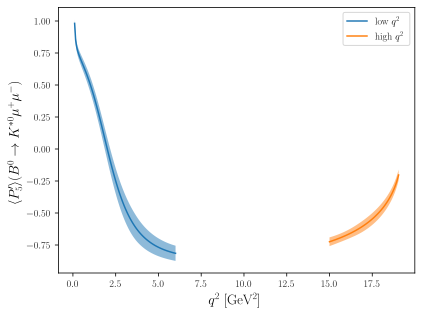

In [57]:
obs1 = 'P5p(B0->K*mumu)'
fpl.diff_plot_th_err(obs1, 0.1, 6, threads=8, label=r'low $q^2$');
fpl.diff_plot_th_err(obs1, 15, 19, threads=8, label=r'high $q^2$');
plt.legend()
plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable[obs].tex);

## Problem

Make a plot comparing the LHCb measurement of $P_5'$ in $B\to K^*\mu^+\mu^-$ to the *binned* SM prediction.

Hints:
- use `flavio.plots.bin_plot_th` for the latter
- Check the `flavio.plots` API docs: <https://flav-io.github.io/apidoc/flavio/plots/plotfunctions.m.html>

/usr/local/lib/python3.11/dist-packages/flavio/physics/bdecays/bvll/qcdf_interpolate.py:33: UserWarning: The QCDF corrections should not be trusted for q2 above 6 GeV^2
  warnings.warn("The QCDF corrections should not be trusted for q2 above 6 GeV^2")


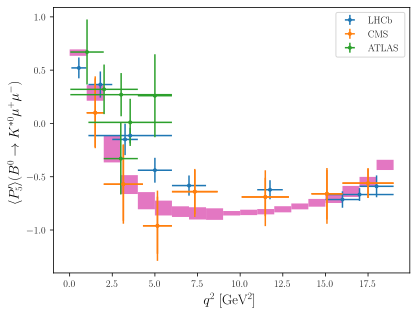

In [60]:
obs = '<P5p>(B0->K*mumu)'
fpl.bin_plot_exp(obs, col_dict={'LHCb': 'C0', 'CMS': 'C1', 'ATLAS': 'C2'})
obs_bins =[(q2, q2+1) for q2 in range(0, 19, 1)]
fpl.bin_plot_th(obs, bin_list=obs_bins)
#obs1 = 'P5p(B0->K*mumu)'
#fpl.diff_plot_th_err(obs1, 0.1, 6, threads=8, label=r'low $q^2$');
#fpl.diff_plot_th_err(obs1, 15, 19, threads=8, label=r'high $q^2$');
plt.legend()
plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable[obs].tex);

Next: [Wilson coefficients](3 Wilson coefficients.ipynb)